<a href="https://colab.research.google.com/github/reinelruiz/taller_machine_learning/blob/main/Tu_primera_red_neuronal_con_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando librerías

In [1]:
from keras.datasets import mnist
from keras import layers, models
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

## Nuestro set de datos

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(60000, 28, 28)

In [4]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<function matplotlib.pyplot.show(close=None, block=None)>

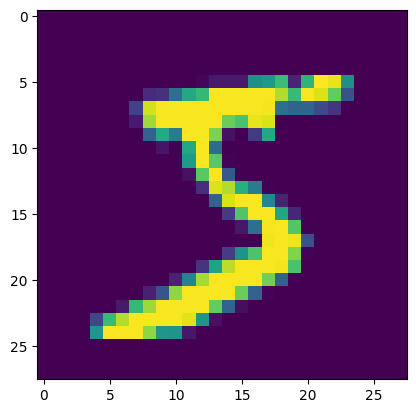

In [6]:
plt.imshow(train_data[0])
plt.show

In [7]:
train_labels[0]

5

## Creando un modelo de datos

In [8]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [9]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Limpieza de datos

In [12]:
#Conversión del formato de los datos y normalización de las imágenes a valores entre 0 y 1
x_train = train_data.reshape((60000,28*28))  # Se reducen las dimensiones para efectos de calculo
x_train = x_train.astype('float32')/255      # Se convierte los valores a la imagen en 0-1

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

# Conversión de las etiquetas a una variable dummy por cada categoria
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

print(train_labels[0])
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Entrenando el modelo

In [15]:
model.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0288 - accuracy: 0.9918
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0222 - accuracy: 0.9934
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0166 - accuracy: 0.9957
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0127 - accuracy: 0.9965
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0093 - accuracy: 0.9977
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0071 - accuracy: 0.9983
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0049 - accuracy: 0.9992
Epoch 8/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0025 - accuracy: 0.9996
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0016 - accuracy: 0.9998

## Gráfica del comportamiento del Loss y Acurracy


## Evaluando sobre data de test

In [16]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0677 - accuracy: 0.9839


[0.0677434504032135, 0.9839000105857849]

# Funciones de Activación y Gráficos

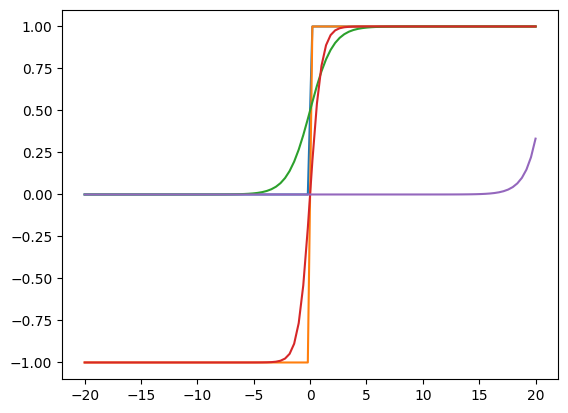

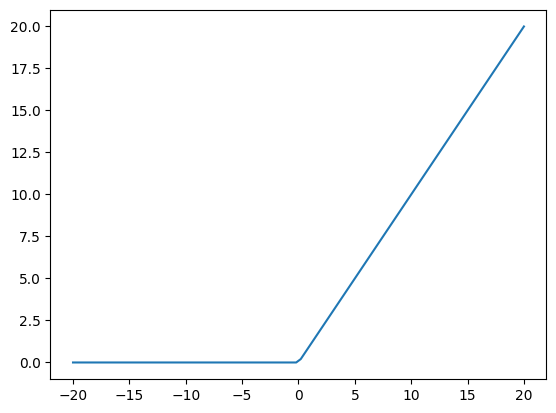

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Funciones
threshold = lambda z: np.piecewise(z, [z < 0, z >= 0], [0, 1])
signum = lambda z: np.piecewise(z, [z < 0, z >= 0], [-1, 1])
sigmoid = lambda z: 1 / (1 + np.exp(-z))
tanh = lambda z: (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
relu = lambda z: np.maximum(0,z)
softmax = lambda z: np.exp(z) / np.sum(np.exp(z))

#Generación de valores
xx = np.linspace(-20,20,100)

#Gráficos
plt.plot(xx,threshold(xx))
plt.plot(xx,signum(xx))
plt.plot(xx,sigmoid(xx))
plt.plot(xx,tanh(xx))
plt.plot(xx,softmax(xx))
plt.show()
plt.plot(xx,relu(xx))
